In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = '/Users/nova/Desktop/hackathon csv files/Q8_a.csv'
file_path_2 = '/Users/nova/Desktop/hackathon csv files/Q8_b.csv'
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path_2)

In [23]:
# Merge DataFrames
merged_df = pd.merge(df, df2, on='venue_xref_id', how='inner')

In [24]:
# display the first 5 rows of the second df
merged_df.head()

,payment_total_tip,bill_total_billed,venue_xref_id,city,country
0,0.0,21.81,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,Collingwood,CA
1,0.0,48.95,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,Collingwood,CA
2,0.0,26.94,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,Collingwood,CA
3,0.0,3.96,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,Collingwood,CA
4,0.0,3.36,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...,Collingwood,CA


In [25]:
# filter out zero bill values
merged_df = merged_df[merged_df['bill_total_billed'] > 0]

In [26]:
# Calculate tip percentage (tip ÷ billed amount)
merged_df['tip_percentage'] = (merged_df['payment_total_tip'] / merged_df['bill_total_billed'])

In [27]:
# Group by City and Country for Analysis
# Average tip amount and percentage by city
city_grouped = merged_df.groupby('city').agg(
    avg_tip_amount=('payment_total_tip', 'mean'),
    avg_bill_amount=('bill_total_billed', 'mean'),
    avg_tip_percentage=('tip_percentage', 'mean'),
    count_transactions=('venue_xref_id', 'count')
).reset_index()

In [28]:
# Average tip amount and percentage by country
country_grouped = merged_df.groupby('country').agg(
    avg_tip_amount=('payment_total_tip', 'mean'),
    avg_bill_amount=('bill_total_billed', 'mean'),
    avg_tip_percentage=('tip_percentage', 'mean'),
    count_transactions=('venue_xref_id', 'count')
).reset_index()

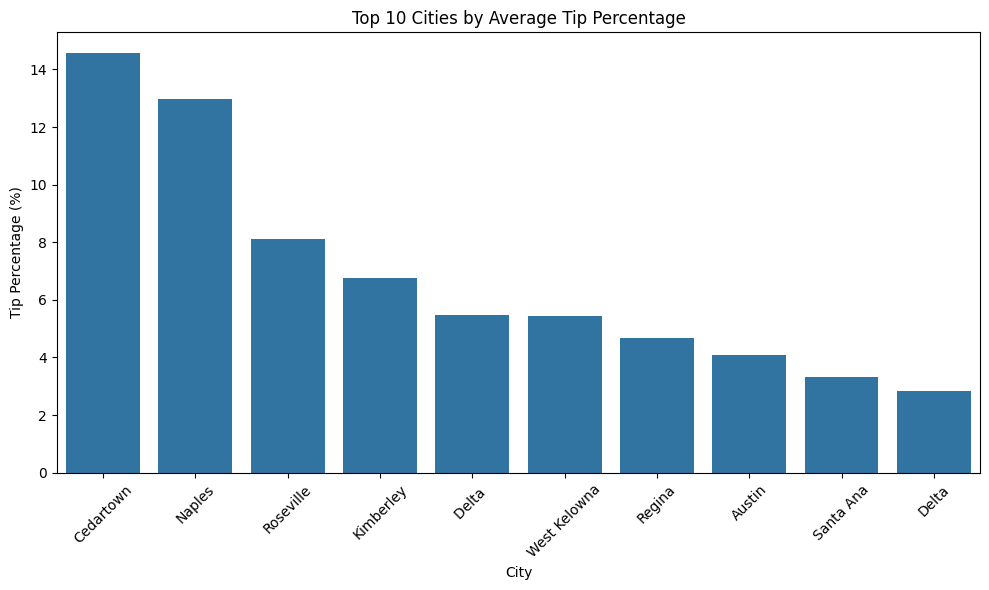

In [29]:
# 1. Sort city_grouped in descending order by avg_tip_percentage
city_grouped_sorted = city_grouped.sort_values(by='avg_tip_percentage', ascending=False)

# 2. Slice the top 10
top_10_cities = city_grouped_sorted.head(10)

# 3. Plot only the top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_cities, x='city', y='avg_tip_percentage')
plt.title('Top 10 Cities by Average Tip Percentage')
plt.xlabel('City')
plt.ylabel('Tip Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()